<a href="https://colab.research.google.com/github/CS-Edwards/vector_search_engine/blob/main/working_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
!{sys.executable} -m pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import csv
import re
import json
import pandas as pd
from tqdm.notebook import trange, tqdm
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen

Utility Functions:





In [ ]:
def get_all_links(url,tagIn, classIn):
  req = Request(url)
  html_page = urlopen(req)
  soup = BeautifulSoup(html_page, "lxml")

  links = list()

  search_area = soup.find(tagIn, class_= classIn)

  for link in search_area.findAll('a'):
      links.append(link.get('href'))
  
  return links
    


In [ ]:
def trim_link(link_list):
    cleaned_list = list()

    for i in range(len(link_list)):
        l_link = link_list[i]
        link = l_link[1:]
        cleaned_list.append(link)
    
    return cleaned_list

In [ ]:
def course_num_title(course_title):
    k=2
    new_string_list = course_title.split(" ",k)
    #print(new_string_list)
    course_num = new_string_list[0]+ " "+ new_string_list[1]
    #print(course_num)
    try:
      new_string_list_1 = new_string_list[-1].split("(")
      new_string_list_1.pop()
      course_title = new_string_list_1[0]

      #print(course_title)
      return [course_num, course_title]
      
    except IndexError:
      print(IndexError)
      print(course_title)
      return [course_num,'title error']

FIX FUNCTION TO APPEND TO EXISTING LIST EXTERIOR LIST -- NO RETURN; pass list in

In [ ]:
from urllib.error import HTTPError
def pull_course_reg(url, rows):

    try:
      req = Request(url)
      html_page = urlopen(req)

      soup = BeautifulSoup(html_page, "lxml")

      dept_name = soup.find('h1')
      dept_name_cleaned = dept_name.text.strip()
      #print(dept_name_cleaned)

      search_table=soup.find_all("table", class_="listOfClasses")
      #print(len(search_table))
      #print(type(search_table))
    
    except HTTPError:
      print(HTTPError)
      print(url)
      return

    try:
        working_table = search_table[0]
    except IndexError:
        print(IndexError)
        print(dept_name_cleaned)
        return -1  #flag an error

    #rows = list()
    # Find all `tr` tags
    data_rows = working_table.find_all('tr')

    for row in data_rows:
        value = row.find_all('td')
        beautified_value = [ele.text.strip() for ele in value]
        
    # Remove data arrays that are empty
        if len(beautified_value) == 0:
            #continue
            return
        beautified_value.append(dept_name_cleaned) #add depatment name to end of row
        rows.append(beautified_value)
    
    #return rows

In [ ]:
def pull_course_desc(url,desc_list_in):

    try:  
      req = Request(url)
      html_page = urlopen(req)
      soup = BeautifulSoup(html_page, "lxml")
    except HTTPError:
      print(HTTPError)
      print(url)
      return

    try:
      courses = soup.find_all("div", class_="post-content")
      #print(type(courses))
      #print(len(courses))

      #desc_list = list()

      for course in courses:
          title = course.find('h2').getText()
          #print(title) 
          course_info = course_num_title(title)
          #description = course.find("div",class_="entry-content").getText() #or p tag
          description = course.find('p').getText()
          course_info.append(description)
          desc_list_in.append(course_info)
    
    except AttributeError:
      print(AttributeError)
      print(url)
      return
   
    #return desc_list

text block

In [ ]:
#UH Manoa Spring '23 Course Reg by Department
reg_url = 'https://www.sis.hawaii.edu/uhdad/avail.classes?i=MAN&t=202330'
raw_reg = get_all_links(reg_url,'div',"columns")
raw_reg[:10]

['./avail.classes?i=MAN&t=202330&s=ACM',
 './avail.classes?i=MAN&t=202330&s=ACC',
 './avail.classes?i=MAN&t=202330&s=AS',
 './avail.classes?i=MAN&t=202330&s=ASL',
 './avail.classes?i=MAN&t=202330&s=AMST',
 './avail.classes?i=MAN&t=202330&s=ANAT',
 './avail.classes?i=MAN&t=202330&s=ANSC',
 './avail.classes?i=MAN&t=202330&s=ANTH',
 './avail.classes?i=MAN&t=202330&s=ARAB',
 './avail.classes?i=MAN&t=202330&s=ARCH']

In [ ]:
reg_url_list = trim_link(raw_reg)
print(len(reg_url_list))
reg_url_list[:10]

158


['/avail.classes?i=MAN&t=202330&s=ACM',
 '/avail.classes?i=MAN&t=202330&s=ACC',
 '/avail.classes?i=MAN&t=202330&s=AS',
 '/avail.classes?i=MAN&t=202330&s=ASL',
 '/avail.classes?i=MAN&t=202330&s=AMST',
 '/avail.classes?i=MAN&t=202330&s=ANAT',
 '/avail.classes?i=MAN&t=202330&s=ANSC',
 '/avail.classes?i=MAN&t=202330&s=ANTH',
 '/avail.classes?i=MAN&t=202330&s=ARAB',
 '/avail.classes?i=MAN&t=202330&s=ARCH']

In [ ]:
#UH Manoa Spring '23 Course Catalog Description by Department
desc_url = 'https://manoa.hawaii.edu/catalog/courses-overview/'
desc_list = get_all_links(desc_url,'ul',"course-directory")
desc_list[:10]

['https://manoa.hawaii.edu/catalog/category/arts-languages-letters/acm/',
 'https://manoa.hawaii.edu/catalog/category/business/acc/',
 'https://manoa.hawaii.edu/catalog/category/rotc/as/',
 'https://manoa.hawaii.edu/catalog/category/ctahr/nrem/arec/',
 'https://manoa.hawaii.edu/catalog/category/arts-languages-letters/ling/asl/',
 'https://manoa.hawaii.edu/catalog/category/arts-languages-letters/amst/',
 'https://manoa.hawaii.edu/catalog/category/jabsom/abprb/anat/',
 'https://manoa.hawaii.edu/catalog/category/jabsom/abprb/',
 'https://manoa.hawaii.edu/catalog/category/ctahr/humannuti/ansc/',
 'https://manoa.hawaii.edu/catalog/category/social-sciences/anth/']

In [ ]:
print(len(desc_list))

216


In [ ]:
with open('data/dept_desc_list.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)    
    write.writerows(desc_list)

In [ ]:
#course registration list  -- all courses

full_reg_list = list()

reg_root = 'https://www.sis.hawaii.edu/uhdad'
reg_url = reg_root + reg_url_list[0]
print(reg_url)



https://www.sis.hawaii.edu/uhdad/avail.classes?i=MAN&t=202330&s=ACM


RE RUN WHEN MAINTENECE IS DONE, PASS IN Full_reg List as paremeter to fix nested output (do not append in for loop; append happens in function)

In [ ]:
for i, dept in tqdm(enumerate(reg_url_list)):
  reg_url = reg_root + reg_url_list[i]
  #full_reg_list.append(pull_course_reg(reg_url))
  pull_course_reg(reg_url,full_reg_list)

  #print(len(full_reg_list))

0it [00:00, ?it/s]

In [ ]:
#write to csv

with open('data/reg_list.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    #write.writerow(fields)
    write.writerows(full_reg_list)

NOTE: BANNER DOWN @ 1pm 12/3/22 for Upgrades (RERUN scrape at another time)

In [ ]:
  print(full_reg_list[:10])

Sandbox Sample while sites are down.

In [ ]:
account_acm_course_reg = [['DA,NI', '87317', 'ACM 215', '001', 'Intro to 3D Computer AnimationRestriction: Department Approval', '3', 'J F Parente', '17', '0', '12', '13', 'W', '0130-0420p', 'CR 220', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA,NI', '87320', 'ACM 216', '001', 'Fundamentals of AnimationRestriction: Department Approval', '3', 'L Margulies', '16', '0', '4', '21', 'M', '0130-0420p', 'CR 212', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DH', '81671', 'ACM 255', '001', 'Intro to CinemaRestriction: Major', '3', 'A H Ladner', '25', '18', '0', '30', 'W', '0930-1220p', 'CR 105', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DH', '88547', 'ACM 255', '002', 'Intro to Cinema', '3', 'A H Ladner', '37', '0', '12', '38', 'W', '0930-1220p', 'CR 105', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA', '87322', 'ACM 310', '001', 'Cinematic Narrative ProductionRestriction: Major', '3', 'S E Schimmel', '18', '0', '16', '14', 'T', '0430-0720p', 'SAKAM B104', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA', '87323', 'ACM 310', '002', 'Cinematic Narrative ProductionRestriction: Major', '3', 'F Titz', '18', '0', '14', '16', 'R', '0900-1150a', 'MOORE 102', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA', '88554', 'ACM 312', '001', 'CinematographyRestriction: Department Approval', '3', 'F Titz', '10', '0', '0', '10', 'T', '0900-1150a', 'SAKAM B309', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA', '87324', 'ACM 314', '001', 'Experimental Art and AnimationRestriction: Instructor Approval', '3', 'L Margulies', '10', '0', '10', '10', 'F', '0130-0420p', 'SAUND 242', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA', '89144', 'ACM 316B', '001', 'Intermediate Animation: 3DRestriction: Department Approval', '3', 'J Hahm', '15', '3', '0', '10', 'M', '0130-0420p', 'CR 220', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA', '88559', 'ACM 317', '001', '3D Cinematography and Dynamics(Light, Camera, and Render)Restriction: Major', '3', 'J Hahm', '18', '0', '7', '3', 'F', '0930-1220p', 'CR 220', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA', '87325', 'ACM 320', '001', 'Animation Production IRestriction: Department Approval', '3', 'J F Parente', '9', '6', '0', '10', 'R', '0130-0420p', 'CR 220', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['', '88560', 'ACM 325', '001', 'Visual EffectsRestriction: Major', '3', 'J F Parente', '18', '0', '4', '6', 'M', '0430-0720p', 'CR 220', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['', '85861', 'ACM 330', '001', 'Independent ProducingRestriction: Major', '3', 'A M Misawa', '9', '7', '0', '10', 'W', '0430-0720p', 'SAKAM D103', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['', '88548', 'ACM 330', '002', 'Independent ProducingRestriction: Major', '3', 'A M Misawa', '16', '0', '5', '5', 'R', '0130-0420p', 'SAKAM D103', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA,WI', '85862', 'ACM 350', '001', 'ScreenwritingRestriction: Major', '3', 'J Moffett', '18', '0', '5', '5', 'T', '0430-0720p', 'SAKAM D103', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA,TXT0,WI', '87241', 'ACM 350', '002', 'ScreenwritingRestriction: Major', '3', 'L Flanary', '18', '0', '10', '15', 'T', '0900-1150a', 'MOORE 102', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA,TXT0,WI', '90031', 'ACM 350', '003', 'ScreenwritingRestriction: Major', '3', 'V Hereniko', '8', '10', '0', '20', 'M', '0930-1220p', 'WEB 104', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DH,TXT0', '88549', 'ACM 360', '001', 'Indigenous Aesthetics', '3', 'L Flanary', '30', '0', '18', '12', 'W', '0130-0420p', 'CR 115', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA,OC', '88555', 'ACM 370', '001', 'Directing the Actor on ScreenRestriction: Department Approval', '3', 'J Moffett', '15', '0', '5', '5', 'R', '0130-0420p', 'SAKAM B309', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA', '87326', 'ACM 372', '001', 'Editing for CinemaRestriction: Department Approval', '3', 'C Wang', '13', '2', '0', '10', 'T', '0130-0420p', 'CR 212', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA', '87327', 'ACM 374', '001', 'Post Production SoundRestriction: Department Approval', '3', 'F Titz', '11', '4', '0', '10', 'W', '0130-0420p', 'CR 212', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DH,TXT0', '88550', 'ACM 380', '001', 'Genre/Narrative Theory(Decolonizing the Screen: Oceanic Cinema in the 21st Century)', '3', 'V Hereniko', '23', '7', '0', '10', 'F', '0930-1220p', 'CR 105', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DH', '88551', 'ACM 382', '001', 'Authors in Creative Media(Film Directors and Screenwriters)', '3', 'M Moody', '16', '44', '0', '10', 'M', '0530-0820p', 'CR 105', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['', '88552', 'ACM 385', '001', 'Topics in Creative Media(Survey of U.S. Television)Restriction: Major', '3', 'C A Acham', '50', '0', '0', '10', 'M', '0130-0420p', 'CR 115', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['', '88556', 'ACM 386', '001', 'Techniques in Creative Media(Dialogue Replacement and Foley)Restriction: Major', '3', 'C Wang', '13', '2', '0', '10', 'M', '0130-0420p', 'SL B08D', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA,TXT0', '87329', 'ACM 405', '001', 'Documentary ProductionRestriction: Department Approval', '3', 'L Flanary', '7', '8', '0', '10', 'R', '0900-1150a', 'KUY 304', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA,OC', '87330', 'ACM 410', '001', 'Advanced Cinematic ProductionRestriction: Department Approval', '3', 'T Takemoto-Chock', '5', '10', '0', '10', 'T', '0130-0420p', 'SAKAM D103', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA', '88558', 'ACM 420', '001', 'Animation Production IIRestriction: Department Approval', '3', 'J Hahm', '9', '6', '0', '10', 'R', '0900-1150a', 'CR 220', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA,WI', '86628', 'ACM 450', '001', 'Advanced ScreenwritingRestriction: Major', '3', 'J Moffett', '12', '3', '0', '10', 'W', '0130-0420p', 'SAKAM C301', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DH,WI', '89149', 'ACM 452C', '001', 'History and Film: Europe(Modern Europe)', '3', 'P Hoffenberg', '16', '0', '10', '0', 'MWF', '0930-1020a', 'GAR 101', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['ETH', '88553', 'ACM 460', '001', 'Ethics and FilmRestriction: Major', '3', 'M Moody', '30', '30', '0', '10', 'W', '0530-0820p', 'CR 105', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['WI', '88557', 'ACM 475', '001', 'Narrative Feature ScreenplayRestriction: Major', '3', 'M Moody', '4', '8', '0', '10', 'T', '0130-0420p', 'SAKAM B309', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['DA', '87331', 'ACM 486', '001', 'Capstone Creative ProductionRestriction: Department Approval', '3', 'S E Schimmel', '12', '3', '0', '10', 'R', '0430-0720p', 'WEB 101', '01/09-05/12', 'Academy for Creative Media (ACM)'], ['', '89153', 'ACM 487', '001', 'Video Game DesignRestriction: Department Approval', '3', 'R S Tabalba', '10', '0', '11', '19', 'W', '0300-0530p', 'KELL 103', '01/09-05/12', 'Academy for Creative Media (ACM)'],['', '86565', 'ACC 200', '001', 'Introduction to Accounting I', '3', 'D C Yang', '12', '28', '0', '10', 'TR', '0900-1015a', 'BUSAD D106', '01/09-05/12', 'Accounting (ACC)'], ['', '86567', 'ACC 200', '002', 'Introduction to Accounting I', '3', 'D C Yang', '22', '18', '0', '10', 'TR', '1030-1145a', 'BUSAD D106', '01/09-05/12', 'Accounting (ACC)'], ['', '86569', 'ACC 200', '003', 'Introduction to Accounting I', '3', 'D C Yang', '32', '8', '0', '10', 'TR', '1200-0115p', 'BUSAD D106', '01/09-05/12', 'Accounting (ACC)'], ['', '86571', 'ACC 200', '004', 'Introduction to Accounting I', '3', 'K V Santaniello', '28', '12', '0', '10', 'WF', '0900-1015a', 'KUY 306', '01/09-05/12', 'Accounting (ACC)'], ['', '86572', 'ACC 200', '005', 'Introduction to Accounting I', '3', 'K V Santaniello', '40', '0', '2', '8', 'WF', '1030-1145a', 'KUY 306', '01/09-05/12', 'Accounting (ACC)'], ['', '88529', 'ACC 200', '006', 'Introduction to Accounting I', '3', 'L Guan', '18', '22', '0', '10', 'WF', '1200-0115p', 'BUSAD D103', '01/09-05/12', 'Accounting (ACC)'], ['', '88530', 'ACC 200', '007', 'Introduction to Accounting I', '3', 'L Guan', '12', '28', '0', '10', 'WF', '0130-0245p', 'BUSAD D103', '01/09-05/12', 'Accounting (ACC)'], ['NI', '87334', 'ACC 210', '001', 'Introduction to Accounting II', '3', 'J N Teruya', '39', '1', '0', '15', 'TR', '0900-1015a', 'BUSAD D101', '01/09-05/12', 'Accounting (ACC)'], ['NI', '87335', 'ACC 210', '002', 'Introduction to Accounting II', '3', 'J N Teruya', '39', '0', '12', '3', 'TR', '1030-1145a', 'BUSAD D101', '01/09-05/12', 'Accounting (ACC)'], ['NI', '87336', 'ACC 210', '003', 'Introduction to Accounting II', '3', 'C M Kaiama', '40', '0', '10', '0', 'TR', '1200-0115p', 'BUSAD D101', '01/09-05/12', 'Accounting (ACC)'], ['NI', '87337', 'ACC 210', '004', 'Introduction to Accounting II', '3', 'B Jung', '31', '9', '0', '10', 'WF', '0900-1015a', 'BUSAD D106', '01/09-05/12', 'Accounting (ACC)'], ['NI', '87338', 'ACC 210', '005', 'Introduction to Accounting II', '3', 'Y Park', '40', '0', '2', '8', 'WF', '1200-0115p', 'BUSAD C101', '01/09-05/12', 'Accounting (ACC)'], ['NI', '87339', 'ACC 210', '006', 'Introduction to Accounting II', '3', 'Y Park', '32', '8', '0', '10', 'WF', '1030-1145a', 'BUSAD C101', '01/09-05/12', 'Accounting (ACC)'], ['NI', '88527', 'ACC 210', '007', 'Introduction to Accounting II', '3', 'C M Kaiama', '40', '0', '10', '0', 'TR', '0130-0245p', 'BUSAD D101', '01/09-05/12', 'Accounting (ACC)'], ['NI', '88528', 'ACC 210', '008', 'Introduction to Accounting II', '3', 'J Jung', '6', '34', '0', '10', 'WF', '0130-0245p', 'KUY 306', '01/09-05/12', 'Accounting (ACC)'], ['NI', '89125', 'ACC 210', '009', 'Introduction to Accounting II', '3', 'J Jung', '17', '23', '0', '10', 'WF', '1200-0115p', 'KUY 306', '01/09-05/12', 'Accounting (ACC)'], ['', '80001', 'ACC 321', '001', 'Intermediate Financial Acc IRestriction: College', '3', 'S J Daniel', '16', '24', '0', '10', 'WF', '1030-1145a', 'BUSAD D106', '01/09-05/12', 'Accounting (ACC)'], ['', '80002', 'ACC 321', '002', 'Intermediate Financial Acc IRestriction: College', '3', 'S J Daniel', '15', '25', '0', '10', 'WF', '1200-0115p', 'BUSAD D106', '01/09-05/12', 'Accounting (ACC)'], ['', '80003', 'ACC 323', '001', 'Intermediate Financial Acc IIRestriction: College', '3', 'M C Woollen', '37', '0', '5', '5', 'WF', '1030-1145a', 'BUSAD D203', '01/09-05/12', 'Accounting (ACC)'], ['', '80004', 'ACC 323', '002', 'Intermediate Financial Acc IIRestriction: College', '3', 'M C Woollen', '22', '15', '0', '10', 'WF', '1200-0115p', 'BUSAD D203', '01/09-05/12', 'Accounting (ACC)'], ['', '82633', 'ACC 395', '001', 'Accounting InternshipRestriction: Instructor Approval', '1-3', 'R W Varley', '15', '25', '0', '10', 'TBA', 'TBA', 'TBA TBA', '01/09-05/12', 'Accounting (ACC)'], ['', '80005', 'ACC 401', '001', 'Federal Individl Income TaxatnRestriction: College', '3', 'M C Woollen', '12', '28', '0', '10', 'TR', '1030-1145a', 'BUSAD D103', '01/09-05/12', 'Accounting (ACC)'], ['', '80006', 'ACC 401', '002', 'Federal Individl Income TaxatnRestriction: College', '3', 'M C Woollen', '22', '18', '0', '10', 'TR', '1200-0115p', 'BUSAD D103', '01/09-05/12', 'Accounting (ACC)'], ['', '86576', 'ACC 409', '001', 'Accounting Information SystemsRestriction: College', '3', 'J Lim', '39', '0', '10', '0', 'TR', '0900-1015a', 'BUSAD D103', '01/09-05/12', 'Accounting (ACC)'], ['', '86575', 'ACC 409', '002', 'Accounting Information SystemsRestriction: College', '3', 'TBA', '0', '0', '', '', 'T', '0600-0845p', 'BUSAD D104', '01/09-05/12', 'Accounting (ACC)'], ['', '88531', 'ACC 413', '001', 'Law for the AccountantRestriction: College', '3', 'T J Messinger', '14', '26', '0', '10', 'R', '0600-0845p', 'BUSAD D101', '01/09-05/12', 'Accounting (ACC)'], ['WI', '84377', 'ACC 418', '001', 'AuditingRestriction: College', '3', 'G T Nishikawa', '20', '0', '9', '1', 'WF', '0900-1015a', 'BUSAD C103', '01/09-05/12', 'Accounting (ACC)'], ['WI', '82632', 'ACC 418', '002', 'AuditingRestriction: College', '3', 'J Zhou', '20', '0', '2', '8', 'WF', '1030-1145a', 'BUSAD D102', '01/09-05/12', 'Accounting (ACC)'], ['WI', '84877', 'ACC 418', '003', 'AuditingRestriction: College', '3', 'TBA', '0', '0', '', '', 'W', '0600-0845p', 'BUSAD E203', '01/09-05/12', 'Accounting (ACC)'], ['', 'ACC 460B meets from "1/9-3/2"; ACC 460E meets from "3/9-5/16". ACC 460B 001 MUST be taken concurrently with ACC 460E 001.', 'Accounting (ACC)'], ['', '87308', 'ACC 460B', '001', 'Acc Capstone: ManagerialRestriction: Major', '1', 'M J Mitsuyasu', '20', '0', '2', '8', 'R', '0900-1045a', 'BUSAD D301', '01/09-03/02', 'Accounting (ACC)'], ['', 'ACC 460B meets from "1/9-3/2"; ACC 460E meets from 3/9-5/16. ACC 460B 002 MUST be taken concurrently with ACC 460E 002.', 'Accounting (ACC)'], ['', '87309', 'ACC 460B', '002', 'Acc Capstone: ManagerialRestriction: Major', '1', 'M J Mitsuyasu', '20', '0', '6', '4', 'R', '1100-1245p', 'BUSAD D301', '01/09-03/02', 'Accounting (ACC)'], ['', 'ACC 460B meets from "1/9-3/2"; ACC 460E meets from 3/9-5/16. ACC 460B 003 MUST be taken concurrently with ACC 460E 003.', 'Accounting (ACC)'], ['', '87310', 'ACC 460B', '003', 'Acc Capstone: ManagerialRestriction: Major', '1', 'TBA', '0', '0', '', '', 'R', '0100-0245p', 'BUSAD D301', '01/09-03/02', 'Accounting (ACC)'], ['', 'ACC 460C meets from 1/9-2/28; ACC 460D meets from "3/7-5/16". ACC 460C 001 MUST be taken concurrently with ACC 460D 001', 'Accounting (ACC)'], ['', '88546', 'ACC 460C', '001', 'Acc Capstone: FinancialRestriction: Major', '1', 'Y Park', '19', '1', '0', '10', 'T', '0900-1045a', 'BUSAD D301', '01/09-03/02', 'Accounting (ACC)'], ['', 'ACC 460C meets from "1/9-2/28"; ACC 460D meets from "3/7-5/16". ACC 460C 002 MUST be taken concurrently with ACC 460D 002', 'Accounting (ACC)'], ['', '87312', 'ACC 460C', '002', 'Acc Capstone: FinancialRestriction: Major', '1', 'Y Park', '20', '0', '4', '6', 'T', '1100-1245p', 'BUSAD D301', '01/09-02/28', 'Accounting (ACC)'], ['', 'ACC 460C meets from "1/9-2/28"; ACC 460D meets from "3/7-5/16". ACC 460C 003 MUST be taken concurrently with ACC 460D 003.', 'Accounting (ACC)'], ['', '87313', 'ACC 460C', '003', 'Acc Capstone: FinancialRestriction: Major', '1', 'TBA', '0', '0', '', '', 'T', '0100-0245p', 'BUSAD D301', '01/09-02/28', 'Accounting (ACC)'], ['', 'ACC 460D meets from "3/7-5/16"; ACC 460C meets from "1/9-2/28". ACC 460D 001 MUST be taken concurrently with ACC 460C 001', 'Accounting (ACC)'], ['', '87314', 'ACC 460D', '001', 'Acc Capstone: Auditing and AISRestriction: Major', '1', 'J R Mendez', '20', '0', '0', '10', 'T', '0900-1045a', 'BUSAD D301', '03/07-05/12', 'Accounting (ACC)'], ['', 'ACC 460D meets from "3/7-5/16"; ACC 460C meets from "1/9-2/28". ACC 460D 002 MUST be taken concurrently with ACC 460C 002', 'Accounting (ACC)'], ['', '87315', 'ACC 460D', '002', 'Acc Capstone: Auditing and AISRestriction: Major', '1', 'J R Mendez', '20', '0', '5', '5', 'T', '1100-1245p', 'BUSAD D301', '03/07-05/12', 'Accounting (ACC)'], ['', 'ACC 460D meets from "3/7-5/16"; ACC 460C meets from "1/9-2/28". ACC 460D 002 MUST be taken concurrently with ACC 460C 003.', 'Accounting (ACC)'], ['', '87316', 'ACC 460D', '003', 'Acc Capstone: Auditing and AISRestriction: Major', '1', 'TBA', '0', '0', '0', '10', 'T', '0100-0245p', 'BUSAD D301', '03/07-05/12', 'Accounting (ACC)'], ['', 'ACC 460E meets from "3/7-5/16"; ACC 460B meets from "1/9-3/2". ACC 460E 001 MUST be taken concurrently with ACC 460B 001.', 'Accounting (ACC)'], ['WI', '84378', 'ACC 460E', '001', 'Acc Capstone: Tax and EthicsRestriction: Major', '1', 'T C Pearson', '20', '0', '3', '7', 'R', '0900-1045a', 'BUSAD D301', '03/09-05/12', 'Accounting (ACC)'], ['', 'ACC 460E meets from "3/9-5/16"; ACC 460B meets from "1/9-3/2". ACC 460E 002 MUST be taken concurrently with ACC 460B 002.', 'Accounting (ACC)'], ['WI', '84379', 'ACC 460E', '002', 'Acc Capstone: Tax and EthicsRestriction: Major', '1', 'T C Pearson', '20', '0', '7', '3', 'R', '1100-1245p', 'BUSAD D301', '03/09-05/12', 'Accounting (ACC)'], ['', 'ACC 460E meets from "3/9-5/16"; ACC 460B meets from "1/9-3/2". ACC 460E 003 MUST be taken concurrently with ACC 460B 003.', 'Accounting (ACC)'], ['WI', '84380', 'ACC 460E', '003', 'Acc Capstone: Tax and EthicsRestriction: Major', '1', 'TBA', '0', '0', '', '', 'R', '0100-0245p', 'BUSAD D301', '03/09-05/12', 'Accounting (ACC)'], ['', '85795', 'ACC 602', '001', 'CPA-Audit and Attestation', '1', 'H Pourjalali', '0', '0', '', '', 'TBA', 'TBA', 'TBA TBA', '01/09-05/12', 'Accounting (ACC)'], ['', '85794', 'ACC 603', '001', 'CPA-BEC', '1', 'H Pourjalali', '2', '0', '', '', 'TBA', 'TBA', 'TBA TBA', '01/09-05/12', 'Accounting (ACC)'], ['', '85796', 'ACC 604', '001', 'CPA-FAR', '1', 'H Pourjalali', '1', '0', '', '', 'TBA', 'TBA', 'TBA TBA', '01/09-05/12', 'Accounting (ACC)'], ['', '85797', 'ACC 605', '001', 'CPA-Regulation', '1', 'H Pourjalali', '1', '0', '', '', 'TBA', 'TBA', 'TBA TBA', '01/09-05/12', 'Accounting (ACC)'], ['', '85311', 'ACC 619', '001', 'Info Assurance & AnalyticsRestriction: Major', '3', 'J Lim', '11', '29', '0', '10', 'T', '0600-0845p', 'BUSAD D101', '01/09-05/12', 'Accounting (ACC)'], ['', '83526', 'ACC 625', '001', 'Accounting & Tax ResearchRestriction: Major', '3', 'T C Pearson', '13', '12', '0', '10', 'W', '0600-0845p', 'BUSAD E201', '01/09-05/12', 'Accounting (ACC)'], ['', 'ACC 648 001 Must be taken concurrently with ACC 660 00', 'Accounting (ACC)'], ['', '85793', 'ACC 648', '001', 'Financial Statements Analysis', '1', 'M J Mitsuyasu', '12', '13', '0', '10', 'M', '0746-0845p', 'BUSAD E202', '01/09-05/12', 'Accounting (ACC)'], ['', 'ACC 660 001 Must be taken concurrently with ACC 648 001', 'Accounting (ACC)'], ['', '80008', 'ACC 660', '001', 'Analysis & Decision-MakingRestriction: Department Approval', '2', 'H Pourjalali', '12', '13', '0', '10', 'M', '0600-0745p', 'BUSAD E202', '01/09-05/12', 'Accounting (ACC)'], ['', '83528', 'ACC 695', '001', 'Accounting InternshipRestriction: Instructor Approval', '1-3', 'R W Varley', '2', '23', '0', '10', 'TBA', 'TBA', 'TBA TBA', '01/09-05/12', 'Accounting (ACC)']]

In [ ]:
with open('data/test.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    #write.writerow(fields)
    write.writerows(account_acm_course_reg)

In [ ]:
#courses in reg
print(len(account_acm_course_reg))

98


In [ ]:
#all course descriptions from catalog
full_course_desc_list = list()

#RUN WHEN DOING FULL IMPLEMENTATION (Over 4 mins to run)
for dept in desc_list:
  pull_course_desc(dept,full_course_desc_list)
  print(len(full_course_desc_list))



51
91
109
112
118
254
<class 'AttributeError'>
https://manoa.hawaii.edu/catalog/category/jabsom/abprb/anat/
254
<class 'AttributeError'>
https://manoa.hawaii.edu/catalog/category/jabsom/abprb/
254
297
433
439
548
689
777
823
868
874
906
971
989
990
1057
1102
1106
<class 'AttributeError'>
https://manoa.hawaii.edu/catalog/category/arts-languages-letters/ipll/cam/
1112
1140
1151
1168
1172
1237
1310
<class 'AttributeError'>
https://manoa.hawaii.edu/catalog/category/engineering/cee/
1344
1369
<class 'AttributeError'>
https://manoa.hawaii.edu/catalog/category/arts-languages-letters/
1803
<class 'AttributeError'>
https://manoa.hawaii.edu/catalog/category/education/
2086
<class 'AttributeError'>
https://manoa.hawaii.edu/catalog/category/engineering/
2120
2123
2815
<class 'AttributeError'>
https://manoa.hawaii.edu/catalog/category/social-sciences/
2993
3438
<class 'AttributeError'>
https://manoa.hawaii.edu/catalog/category/social-sciences/com/
3480
3489
3523
3583
3588
3622
3691
3795
3799
3838
3

In [ ]:
with open('data/full_course_desc.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    #write.writerow(fields)
    write.writerows(full_course_desc_list)

In [ ]:
# Sample
#temp_desc_list = ['https://manoa.hawaii.edu/catalog/category/arts-languages-letters/acm/',
#  'https://manoa.hawaii.edu/catalog/category/business/acc/']

# for dept in temp_desc_list:
#   pull_course_desc(dept,full_course_desc_list)
#   print(len(full_course_desc_list))

In [ ]:
#list to dataframe --> then merge on course 

#description list to dataframe
df_desc = pd.DataFrame (full_course_desc_list, columns = ['course','course_name','description'])
df_desc

,course,course_name,description
0,ACM 210,Introduction to Cinematic Digital Production,Introduction to the basic techniques of cinema...
1,ACM 215,Introduction to 3D Computer Animation,A basic overview of the 3D animation productio...
2,ACM 216,Fundamentals of Animation,Introduction to traditional styles and methods...
3,ACM 255,Introduction to Cinema and Digital Media,"Introduction to the study of cinema: history, ..."
4,ACM 310,Cinematic Narrative Production,Production-intensive course with collaborative...
...,...,...,...
12437,ZOOL 739,Topics in Ecology,Advanced topics in ecology; discussion of lite...
12438,ZOOL 750,Topics in Conservation Biology,Advanced topics in conservation and environmen...
12439,ZOOL 780,Foundations of Evolution and Ecology I,Graduate level introduction to evolution and e...
12440,ZOOL 781,Foundations of Evolution and Ecology II,Graduate level introduction to evolution and e...


In [ ]:
#registration list to dataframe
reg_col = ['GenEd/Focus/Special Des.','CRN','course','Section','Title','Credits','Instructor', 'Curr.Enrolled','Seatsavail','Curr.Waitlisted','Waitavail.','Days','Time','Room','Dates','Department']
df_reg = pd.DataFrame (full_reg_list, columns = reg_col)  #change var to full_reg_list
df_reg

,GenEd/Focus/Special Des.,CRN,course,Section,Title,Credits,Instructor,Curr.Enrolled,Seatsavail,Curr.Waitlisted,Waitavail.,Days,Time,Room,Dates,Department
0,Academy for Creative Media (ACM),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,"DA,NI",87317,ACM 215,001,Intro to 3D Computer AnimationRestriction: Dep...,3,J F Parente,17,0,15,10,W,0130-0420p,CR 220,01/09-05/12,Academy for Creative Media (ACM)
2,"DA,NI",87320,ACM 216,001,Fundamentals of AnimationRestriction: Departme...,3,L Margulies,16,0,6,19,M,0130-0420p,CR 212,01/09-05/12,Academy for Creative Media (ACM)
3,DH,81671,ACM 255,001,Intro to CinemaRestriction: Major,3,A H Ladner,25,20,0,30,W,0930-1220p,CR 105,01/09-05/12,Academy for Creative Media (ACM)
4,DH,88547,ACM 255,002,Intro to Cinema,3,A H Ladner,35,0,14,36,W,0930-1220p,CR 105,01/09-05/12,Academy for Creative Media (ACM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,,85110,ZOOL 719,001,Tpcs in Systematics & EvolutioRestriction: Ins...,1-6,P B Marko,0,0,,,TBA,TBA,TBA TBA,01/09-05/12,Zoology (ZOOL)
8648,,86065,ZOOL 719,004,Tpcs in Systematics & Evolutio,1-6,K Cole,1,9,0,10,TBA,TBA,TBA TBA,01/09-05/12,Zoology (ZOOL)
8649,,87255,ZOOL 719,006,Tpcs in Systematics & Evolutio,1-6,M A Butler,0,12,0,10,WF,0800-0920a,TBA TBA,01/09-05/12,Zoology (ZOOL)
8650,,89148,ZOOL 781,001,Foundations of Evol & Ecol II,4,R C Thomson,8,8,0,10,MWF,0130-0220p,WEB 116,01/09-05/12,Zoology (ZOOL)


In [ ]:
#merge dataframes

inner_join = pd.merge(df_reg,df_desc, on='course', how='inner')
inner_join

,GenEd/Focus/Special Des.,CRN,course,Section,Title,Credits,Instructor,Curr.Enrolled,Seatsavail,Curr.Waitlisted,Waitavail.,Days,Time,Room,Dates,Department,course_name,description
0,"DA,NI",87317,ACM 215,001,Intro to 3D Computer AnimationRestriction: Dep...,3,J F Parente,17,0,15,10,W,0130-0420p,CR 220,01/09-05/12,Academy for Creative Media (ACM),Introduction to 3D Computer Animation,A basic overview of the 3D animation productio...
1,"DA,NI",87317,ACM 215,001,Intro to 3D Computer AnimationRestriction: Dep...,3,J F Parente,17,0,15,10,W,0130-0420p,CR 220,01/09-05/12,Academy for Creative Media (ACM),Introduction to 3D Computer Animation,A basic overview of the 3D animation productio...
2,"DA,NI",87317,ACM 215,001,Intro to 3D Computer AnimationRestriction: Dep...,3,J F Parente,17,0,15,10,W,0130-0420p,CR 220,01/09-05/12,Academy for Creative Media (ACM),Introduction to 3D Computer Animation,A basic overview of the 3D animation productio...
3,"DA,NI",87317,ACM 215,001,Intro to 3D Computer AnimationRestriction: Dep...,3,J F Parente,17,0,15,10,W,0130-0420p,CR 220,01/09-05/12,Academy for Creative Media (ACM),Introduction to 3D Computer Animation,A basic overview of the 3D animation productio...
4,"DA,NI",87320,ACM 216,001,Fundamentals of AnimationRestriction: Departme...,3,L Margulies,16,0,6,19,M,0130-0420p,CR 212,01/09-05/12,Academy for Creative Media (ACM),Fundamentals of Animation,Introduction to traditional styles and methods...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11265,,89148,ZOOL 781,001,Foundations of Evol & Ecol II,4,R C Thomson,8,8,0,10,MWF,0130-0220p,WEB 116,01/09-05/12,Zoology (ZOOL),Foundations of Evolution and Ecology II,Graduate level introduction to evolution and e...
11266,,89148,ZOOL 781,001,Foundations of Evol & Ecol II,4,R C Thomson,8,8,0,10,MWF,0130-0220p,WEB 116,01/09-05/12,Zoology (ZOOL),Foundations of Evolution and Ecology II,Graduate level introduction to evolution and e...
11267,,89148,ZOOL 781,001,Foundations of Evol & Ecol II,4,R C Thomson,8,8,0,10,MWF,0130-0220p,WEB 116,01/09-05/12,Zoology (ZOOL),Foundations of Evolution and Ecology II,Graduate level introduction to evolution and e...
11268,,89148,ZOOL 781,001,Foundations of Evol & Ecol II,4,R C Thomson,8,8,0,10,MWF,0130-0220p,WEB 116,01/09-05/12,Zoology (ZOOL),Foundations of Evolution and Ecology II,Graduate level introduction to evolution and e...


In [ ]:
inner_join.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11270 entries, 0 to 11269
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GenEd/Focus/Special Des.  11270 non-null  object
 1   CRN                       11270 non-null  object
 2   course                    11270 non-null  object
 3   Section                   11270 non-null  object
 4   Title                     11270 non-null  object
 5   Credits                   11270 non-null  object
 6   Instructor                11270 non-null  object
 7   Curr.Enrolled             11270 non-null  object
 8   Seatsavail                11270 non-null  object
 9   Curr.Waitlisted           11270 non-null  object
 10  Waitavail.                11270 non-null  object
 11  Days                      11270 non-null  object
 12  Time                      11270 non-null  object
 13  Room                      11270 non-null  object
 14  Dates                 

In [ ]:
data = inner_join[['course','Credits','Instructor','Department','course_name','description']].copy()
data

,course,Credits,Instructor,Department,course_name,description
0,ACM 215,3,J F Parente,Academy for Creative Media (ACM),Introduction to 3D Computer Animation,A basic overview of the 3D animation productio...
1,ACM 215,3,J F Parente,Academy for Creative Media (ACM),Introduction to 3D Computer Animation,A basic overview of the 3D animation productio...
2,ACM 215,3,J F Parente,Academy for Creative Media (ACM),Introduction to 3D Computer Animation,A basic overview of the 3D animation productio...
3,ACM 215,3,J F Parente,Academy for Creative Media (ACM),Introduction to 3D Computer Animation,A basic overview of the 3D animation productio...
4,ACM 216,3,L Margulies,Academy for Creative Media (ACM),Fundamentals of Animation,Introduction to traditional styles and methods...
...,...,...,...,...,...,...
11265,ZOOL 781,4,R C Thomson,Zoology (ZOOL),Foundations of Evolution and Ecology II,Graduate level introduction to evolution and e...
11266,ZOOL 781,4,R C Thomson,Zoology (ZOOL),Foundations of Evolution and Ecology II,Graduate level introduction to evolution and e...
11267,ZOOL 781,4,R C Thomson,Zoology (ZOOL),Foundations of Evolution and Ecology II,Graduate level introduction to evolution and e...
11268,ZOOL 781,4,R C Thomson,Zoology (ZOOL),Foundations of Evolution and Ecology II,Graduate level introduction to evolution and e...


In [ ]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11270 entries, 0 to 11269
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   course       11270 non-null  object
 1   Credits      11270 non-null  object
 2   Instructor   11270 non-null  object
 3   Department   11270 non-null  object
 4   course_name  11270 non-null  object
 5   description  11270 non-null  object
dtypes: object(6)
memory usage: 7.1 MB


In [ ]:
data= data.drop_duplicates()

In [ ]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2465 entries, 0 to 11264
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   course       2465 non-null   object
 1   Credits      2465 non-null   object
 2   Instructor   2465 non-null   object
 3   Department   2465 non-null   object
 4   course_name  2465 non-null   object
 5   description  2465 non-null   object
dtypes: object(6)
memory usage: 1.6 MB


In [ ]:
data['vec_str'] = data[['course_name','description','Department']].agg(" ".join,axis=1) #to list --> into encoding model --> expected shape (57,768)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(data['vec_str'][0])

Introduction to 3D Computer Animation  A basic overview of the 3D animation production process, including modeling, texturing, rigging, animation, lighting, and rendering. A-F only. Pre: 255 (or concurrent). Academy for Creative Media (ACM)


In [ ]:
course_vecs_list = data['vec_str'].values.tolist()

In [ ]:
len(course_vecs_list)

2465

In [ ]:
course_vecs_list[:5]

['Introduction to 3D Computer Animation  A basic overview of the 3D animation production process, including modeling, texturing, rigging, animation, lighting, and rendering. A-F only. Pre: 255 (or concurrent). Academy for Creative Media (ACM)',
 'Fundamentals of Animation  Introduction to traditional styles and methods of hand drawn 2D, digital, and stop motion animation through theory and practice. A-F only. Pre: 255 (or concurrent) and ART 113, or consent. Academy for Creative Media (ACM)',
 'Introduction to Cinema and Digital Media  Introduction to the study of cinema: history, aesthetics, and cultural impact. A-F only. Academy for Creative Media (ACM)',
 'Cinematic Narrative Production  Production-intensive course with collaborative as well as individual projects. Theories and application of basic digital cinema productions, including camera, lighting, sound, and editing. ACM majors only. A-F only. Pre: 255 (or concurrent). Academy for Creative Media (ACM)',
 'Cinematic Narrative P

In [ ]:
with open('data/course_text_for_vec.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    #write.writerow(fields)
    write.writerows(course_vecs_list)

In [ ]:
#dataframe to csv
data.to_csv('data/data_df.csv')

In [ ]:
#test
data_df = pd.read_csv('data/data_df.csv')

In [ ]:
data_df

,Unnamed: 0,course,Credits,Instructor,Department,course_name,description,vec_str
0,0,ACM 215,3,J F Parente,Academy for Creative Media (ACM),Introduction to 3D Computer Animation,A basic overview of the 3D animation productio...,Introduction to 3D Computer Animation A basic...
1,4,ACM 216,3,L Margulies,Academy for Creative Media (ACM),Fundamentals of Animation,Introduction to traditional styles and methods...,Fundamentals of Animation Introduction to tra...
2,8,ACM 255,3,A H Ladner,Academy for Creative Media (ACM),Introduction to Cinema and Digital Media,"Introduction to the study of cinema: history, ...",Introduction to Cinema and Digital Media Intr...
3,16,ACM 310,3,S E Schimmel,Academy for Creative Media (ACM),Cinematic Narrative Production,Production-intensive course with collaborative...,Cinematic Narrative Production Production-int...
4,18,ACM 310,3,F Titz,Academy for Creative Media (ACM),Cinematic Narrative Production,Production-intensive course with collaborative...,Cinematic Narrative Production Production-int...
...,...,...,...,...,...,...,...,...
2460,11240,ZOOL 710,2-4,M A Butler,Zoology (ZOOL),Topics in Biometry,Selected advanced topics in experimental desig...,Topics in Biometry Selected advanced topics i...
2461,11246,ZOOL 719,1-6,P B Marko,Zoology (ZOOL),Topics in Systematics and Evolution,Selected problems of current or historic inter...,Topics in Systematics and Evolution Selected ...
2462,11249,ZOOL 719,1-6,K Cole,Zoology (ZOOL),Topics in Systematics and Evolution,Selected problems of current or historic inter...,Topics in Systematics and Evolution Selected ...
2463,11252,ZOOL 719,1-6,M A Butler,Zoology (ZOOL),Topics in Systematics and Evolution,Selected problems of current or historic inter...,Topics in Systematics and Evolution Selected ...


**Weaviate**

In [ ]:
import sys
!{sys.executable} -m pip install weaviate-client==3.0.0
!{sys.executable} -m pip install torch 
!{sys.executable} -m pip install transformers 
!{sys.executable} -m pip install nltk 
!{sys.executable} -m pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 5.7 MB/s 
     |████████████████████████████████| 76 kB 5.4 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 27.6 MB/s 
     |████████████████████████████████| 182 kB 94.5 MB/s 
     |████████████████████████████████| 7.6 MB 70.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!{sys.executable} -m pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.4 MB/s 
     |████████████████████████████████| 1.3 MB 62.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=1ee7345c6641b5760add83d6e64b80850fdd2ac0ecc8c3e8276f6a44c22bef71
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
from getpass import getpass
import weaviate
from weaviate.wcs import WCS
import torch
import uuid
import tqdm
from transformers import AutoModel, AutoTokenizer
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer

In [ ]:
my_credentials = weaviate.auth.AuthClientPassword(username=input("User name: "), password=getpass('Password: '))


User name: cedward2@hawaii.edu
Password: ··········


In [ ]:
my_wcs = WCS(my_credentials)

In [ ]:
cluster_name = 'course-search-instance'
weaviate_url = my_wcs.create(cluster_name)
weaviate_url

100%|██████████| 100/100 [00:58<00:00,  1.71it/s]


'https://course-search-instance.semi.network'

In [ ]:
my_wcs.is_ready(cluster_name)

True

In [ ]:
client = weaviate.Client(weaviate_url)

**Schema:**

In [ ]:
#clear any previous schema on instance
client.schema.delete_all() # delete all classes
client.schema.get()

{'classes': []}

In [ ]:
#simple class #default configs #no vector
course_schema = {
     "classes": [{
                    "class": "Course",
                    "description": "A Course class to store: course_name, description, credits, instructor, department",
                    "vectorizer": "none", # explicitly tell Weaviate not to vectorize anything, we are providing the vectors ourselves through our BERT model
                    "properties": [{
                        "dataType": [
                          "string"
                        ],
                        "description": "The deptarment and number of the course",
                        "name": "courseID"
                      },
                      {
                        "dataType": [
                          "text"
                        ],
                        "description": "The course description from catalog",
                        "name": "description"
                      },{
                        "dataType": [
                          "string"
                        ],
                        "description": "The name of the course",
                        "name": "courseName"
                      },
                      {
                        "dataType": [
                          "int"
                        ],
                        "description": "Number of credits for the course",
                        "name": "credits"
                      },
                      {
                        "dataType": [
                          "string"
                        ],
                        "description": "Instructor of this course",
                        "name": "instructor"
                      },
                      {
                        "dataType": [
                          "string"
                        ],
                        "description": "Academic department of this course",
                        "name": "department"
                      }]
            }]}

In [ ]:
#updated schema no_vectorizer

DNU_course_schema = {
     "classes": [{
                    "class": "Course",
                    "description": "A Course class to store: course_name, description, credits, Instructor, Department",
                    "vectorizer": "none", # explicitly tell Weaviate not to vectorize anything, we are providing the vectors ourselves through our BERT model
                    "properties": [{
                        "dataType": [
                          "string"
                        ],
                        "description": "The name of the course",
                        "name": "courseName"
                      },
                      {
                        "dataType": [
                          "text"
                        ],
                        "description": "The course description from catalog",
                        "name": "description"
                      },
                      {
                        "dataType": [
                          "int"
                        ],
                        "description": "Number of credits for the course",
                        "name": "credits"
                      },
                      {
                        "dataType": [
                          "Instructor"
                        ],
                        "description": "Instructor of this course",
                        "name": "hasInstructor"
                      },
                      {
                        "dataType": [
                          "Department"
                        ],
                        "description": "Academic department of this course",
                        "name": "inDepartment"
                      }]
            },
            {
                    "class": "Instructor",
                    "description": "Instructor class has instructor name and Department information",
                    "vectorizer": "none", # explicitly tell Weaviate not to vectorize anything, we are providing the vectors ourselves through our BERT model
                    "properties": [{
                        "dataType": [
                          "string"
                        ],
                        "description": "The name of the author",
                        "name": "name"
                      },
                      {
                        "dataType": [
                          "Course"
                        ],
                        "description": "The courses taught by Instructor",
                        "name": "hasCourses"
                      },
                      {
                        "dataType": [
                          "Department"
                        ],
                        "description": "Instructor in this Department",
                        "name": "inDepartment"
                      }
                        
                    ]
            },
            {
                   "class": "Department",
                    "description": "Academic Department has courses and instructors",
                    "vectorizer": "none", # explicitly tell Weaviate not to vectorize anything, we are providing the vectors ourselves through our BERT model
                    "properties": [{
                        "dataType": [
                          "string"
                        ],
                        "description": "name of Department",
                        "name": "name"
                      },        
                      {
                        "dataType": [
                          "Instructor"
                        ],
                        "description": "The instructors in the department",
                        "name": "hasInstructor"
                      },
                      {
                        "dataType": [
                          "Course"
                        ],
                        "description": "The courses in the department",
                        "name": "hasCourses"
                      }]
            },
            ]
}

In [ ]:
client.schema.create(course_schema)

In [ ]:
client.schema.get()

{'classes': [{'class': 'Course',
   'description': 'A Course class to store: course_name, description, credits, instructor, department',
   'invertedIndexConfig': {'bm25': {'b': 0.75, 'k1': 1.2},
    'cleanupIntervalSeconds': 60,
    'stopwords': {'additions': None, 'preset': 'en', 'removals': None}},
   'properties': [{'dataType': ['string'],
     'description': 'The deptarment and number of the course',
     'name': 'courseID',
     'tokenization': 'word'},
    {'dataType': ['text'],
     'description': 'The course description from catalog',
     'name': 'description',
     'tokenization': 'word'},
    {'dataType': ['string'],
     'description': 'The name of the course',
     'name': 'courseName',
     'tokenization': 'word'},
    {'dataType': ['int'],
     'description': 'Number of credits for the course',
     'name': 'credits'},
    {'dataType': ['string'],
     'description': 'Instructor of this course',
     'name': 'instructor',
     'tokenization': 'word'},
    {'dataType': [

VECTORS

In [ ]:
model_in = 'bert-base-nli-mean-tokens'

In [ ]:
model =  SentenceTransformer(model_in)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
#create vector for course: name + description
#create vector for department: name 

Load Data

In [ ]:
inner_join.iloc[0]

GenEd/Focus/Special Des.                                                DA,NI
CRN                                                                     87317
course                                                                ACM 215
Section                                                                   001
Title                       Intro to 3D Computer AnimationRestriction: Dep...
Credits                                                                     3
Instructor                                                        J F Parente
Curr.Enrolled                                                              17
Seatsavail                                                                  0
Curr.Waitlisted                                                            12
Waitavail.                                                                 13
Days                                                                        W
Time                                                            

In [ ]:
inner_join.iloc[0]['Department']

'Academy for Creative Media (ACM)'

In [ ]:
course_object = {
    'courseName':inner_join.iloc[0]['course_name'],
    'description':inner_join.iloc[0]['description'],
    'credits':int(inner_join.iloc[0]['Credits']),
    'instructor':inner_join.iloc[0]['Instructor'],
    'department':inner_join.iloc[0]['Department']

}

In [ ]:
course_object

{'courseName': 'Introduction to 3D Computer Animation ',
 'description': 'A basic overview of the 3D animation production process, including modeling, texturing, rigging, animation, lighting, and rendering. A-F only. Pre: 255 (or concurrent).',
 'credits': 3,
 'instructor': 'J F Parente',
 'department': 'Academy for Creative Media (ACM)'}

In [ ]:
##Code for this function sourced from Weaviate documentation!

def generate_uuid(class_name: str, identifier: str,
                  test: str = 'teststrong') -> str:
    """ Generate a uuid based on an identifier
    :param identifier: characters used to generate the uuid
    :type identifier: str, required
    :param class_name: classname of the object to create a uuid for
    :type class_name: str, required
    """
    test = 'overwritten'
    return str(uuid.uuid5(uuid.NAMESPACE_DNS, class_name + identifier))

In [ ]:
course_id = generate_uuid('Course',inner_join.iloc[0]['CRN'])

In [ ]:
course_id

'a499ce32-bd9c-547d-bdc9-072737a6edc5'

In [ ]:
result = client.data_object.validate(
    data_object=course_object,
    class_name='Course',
    uuid = course_id,
    
)

In [ ]:
result

{'error': None, 'valid': True}

VECTOR SANDBOX

In [ ]:
#ziptest

lat =['A','B','C']
lon = [1,2,3]

newList = [*zip(lat,lon)]
newList

In [ ]:
vec_str = inner_join.iloc[0]['course_name'] +' '+ inner_join.iloc[0]['description'] + ' '+ inner_join.iloc[0]['Department']
vec_str

'Introduction to 3D Computer Animation  A basic overview of the 3D animation production process, including modeling, texturing, rigging, animation, lighting, and rendering. A-F only. Pre: 255 (or concurrent). Academy for Creative Media (ACM)'

In [ ]:
vec_str1 = inner_join.iloc[1]['course_name'] +' '+ inner_join.iloc[1]['description'] + ' '+ inner_join.iloc[1]['Department']
vec_str1

In [ ]:
vec = model.encode([vec_str])
vec.shape

(1, 768)

In [ ]:
vec_str_lst = list()
vec_str_lst.append(vec_str)
vec_str_lst.append(vec_str1)
len(vec_str_lst)

In [ ]:
vec2 = model.encode(vec_str_lst)
vec2.shape

In [ ]:
print(type(vec2))

In [ ]:
vec2  

Load Object to Weaviate

In [ ]:
client.data_object.create(
    data_object=course_object,
    class_name='Course',
    uuid = course_id,
    vector = vec
)

'a499ce32-bd9c-547d-bdc9-072737a6edc5'

In [ ]:
client.data_object.get(course_id, with_vector=False)

{'class': 'Course',
 'creationTimeUnix': 1670205852465,
 'id': 'a499ce32-bd9c-547d-bdc9-072737a6edc5',
 'lastUpdateTimeUnix': 1670205852465,
 'properties': {'courseName': 'Introduction to 3D Computer Animation ',
  'credits': 3,
  'department': 'Academy for Creative Media (ACM)',
  'description': 'A basic overview of the 3D animation production process, including modeling, texturing, rigging, animation, lighting, and rendering. A-F only. Pre: 255 (or concurrent).',
  'instructor': 'J F Parente'},
 'vectorWeights': None}

Helper functions for batches

In [ ]:
from weaviate.batch import Batch # for the typing purposes
from weaviate.util import generate_uuid5 # old way was from weaviate.tools import generate_uuid


Took appx 15min to encode appx. 2.5k Descriptions


In [ ]:
course_vecs = model.encode(course_vecs_list)

In [ ]:
course_vecs.shape

(2465, 768)

In [ ]:
import numpy as np

In [ ]:
np.save('data/embeddings',course_vecs)

In [ ]:
#testing
saved_embeddings= np.load('data/embeddings.npy')

In [ ]:
saved_embeddings.shape

(2465, 768)

In [ ]:
#reference

course_object = {
    'courseName':inner_join.iloc[0]['course_name'],
    'description':inner_join.iloc[0]['description'],
    'credits':int(inner_join.iloc[0]['Credits']),
    'instructor':inner_join.iloc[0]['Instructor'],
    'department':inner_join.iloc[0]['Department']

}

client.data_object.create(
    data_object=course_object,
    class_name='Course',
    uuid = course_id,
    vector = vec
)

In [ ]:
def generate_uuid_mod(class_name: str, identifier: str,int:i,
                  test: str = 'teststrong') -> str:
    """ Generate a uuid based on an identifier
    :param identifier: characters used to generate the uuid
    :type identifier: str, required
    :param class_name: classname of the object to create a uuid for
    :type class_name: str, required
    """
    test = 'overwritten'
    return str(uuid.uuid5(uuid.NAMESPACE_DNS, class_name + identifier+str(i)))

In [ ]:
##UPDATE SCHEMA AND THIS FUNCTION TO INCLUDE course  (ACM 123) in properties

def add_course(batch, df,vec,i):

  print('create object')
  try:
    course_object = {
      'courseID':df['course'],
      'courseName':df['course_name'],
      'description':df['description'],
      'credits':int(df['Credits']),
      'instructor':df['Instructor'],
      'department':df['Department']
    } 
  except ValueError:
    print(ValueError)
    course_object = {
      'courseID':df['course'],
      'courseName':df['course_name'],      
      'description':df['description'],
      'credits':2,
      'instructor':df['Instructor'],
      'department':df['Department']
    } 

  print('create_uuid')
  course_id = generate_uuid_mod('Course',df['course'],i)

  print('add to batch')
  batch.add_data_object(
      data_object = course_object,
      class_name = 'Course',
      uuid = course_id,
      vector = vec
  )

  print(course_object, course_id)



In [ ]:
client.batch.configure(
    batch_size = 500,
    callback = None
)

In [ ]:
batch = client.batch

In [ ]:
#batch = 'temp'

for i in range(len(data)):
  add_course(batch,data.iloc[i],course_vecs[i],i)

#client.batch.flush

create object
create_uuid
add to batch
{'courseID': 'ACM 215', 'courseName': 'Introduction to 3D Computer Animation ', 'description': 'A basic overview of the 3D animation production process, including modeling, texturing, rigging, animation, lighting, and rendering. A-F only. Pre: 255 (or concurrent).', 'credits': 3, 'instructor': 'J F Parente', 'department': 'Academy for Creative Media (ACM)'} 20c5e769-dc6f-5a1a-aa40-8468732e4a16
create object
create_uuid
add to batch
{'courseID': 'ACM 216', 'courseName': 'Fundamentals of Animation ', 'description': 'Introduction to traditional styles and methods of hand drawn 2D, digital, and stop motion animation through theory and practice. A-F only. Pre: 255 (or concurrent) and ART 113, or consent.', 'credits': 3, 'instructor': 'L Margulies', 'department': 'Academy for Creative Media (ACM)'} 26196c79-09ea-5ea5-8de8-29480c6db0b2
create object
create_uuid
add to batch
{'courseID': 'ACM 255', 'courseName': 'Introduction to Cinema and Digital Media '

ConnectionError: ignored

Query Data

see entries in VDB

In [ ]:
result = client.query.get(class_name='Course', properties=["courseName","instructor"])\
    .with_limit(200)\
    .do()

print(f"Number of courses returned: {len(result['data']['Get']['Course'])}")
result



Number of courses returned: 51


{'data': {'Get': {'Course': [{'courseName': 'Introduction to Accounting II ',
     'instructor': 'B Jung'},
    {'courseName': 'Cinematography ', 'instructor': 'F Titz'},
    {'courseName': 'Experimental Art and Animation ',
     'instructor': 'L Margulies'},
    {'courseName': 'Cinematic Narrative Production ', 'instructor': 'F Titz'},
    {'courseName': 'Post Production Sound ', 'instructor': 'F Titz'},
    {'courseName': 'Law for the Accountant ', 'instructor': 'T J Messinger'},
    {'courseName': 'Introduction to 3D Computer Animation ',
     'instructor': 'J F Parente'},
    {'courseName': 'Screenwriting ', 'instructor': 'L Flanary'},
    {'courseName': 'Fundamentals of Animation ', 'instructor': 'L Margulies'},
    {'courseName': 'Introduction to Accounting II ',
     'instructor': 'C M Kaiama'},
    {'courseName': 'Advanced Screenwriting ', 'instructor': 'J Moffett'},
    {'courseName': 'Screenwriting ', 'instructor': 'J Moffett'},
    {'courseName': 'Intermediate Financial Acco

In [ ]:
query = 'cartoons'
q_vec = model.encode(query)

nearVec= {"vector":q_vec}
res = client.query.get(class_name='Course', properties=["courseName","instructor"])\
    .with_limit(5)\
    .with_near_vector(nearVec)\
    .do()

res

{'data': {'Get': {'Course': [{'courseName': 'Fundamentals of Animation ',
     'instructor': 'L Margulies'},
    {'courseName': 'Introduction to 3D Computer Animation ',
     'instructor': 'J F Parente'},
    {'courseName': 'Introduction to 3D Computer Animation ',
     'instructor': 'J F Parente'},
    {'courseName': 'Experimental Art and Animation ',
     'instructor': 'L Margulies'},
    {'courseName': 'Indigenous Aesthetics ', 'instructor': 'L Flanary'}]}}}

Data Visualization: PCA and TSNE

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [ ]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [ ]:
#3D TSNE
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(saved_embeddings)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2465 samples in 0.002s...
[t-SNE] Computed neighbors for 2465 samples in 0.317s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2465
[t-SNE] Computed conditional probabilities for sample 2000 / 2465
[t-SNE] Computed conditional probabilities for sample 2465 / 2465
[t-SNE] Mean sigma: 4.510565
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.570854
[t-SNE] KL divergence after 300 iterations: 1.465170


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


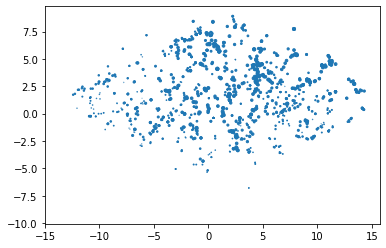

In [ ]:
plt.scatter(tsne_results[:,0],tsne_results[:,1], tsne_results[:,2])

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(saved_embeddings)

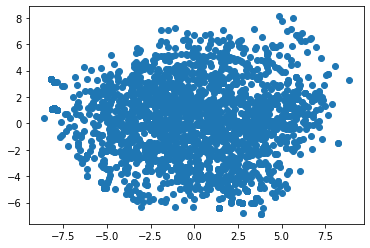

In [ ]:
plt.scatter(pca_result[:,0],pca_result[:,1])

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(saved_embeddings)

In [ ]:
#new df
df = pd.DataFrame()


In [ ]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

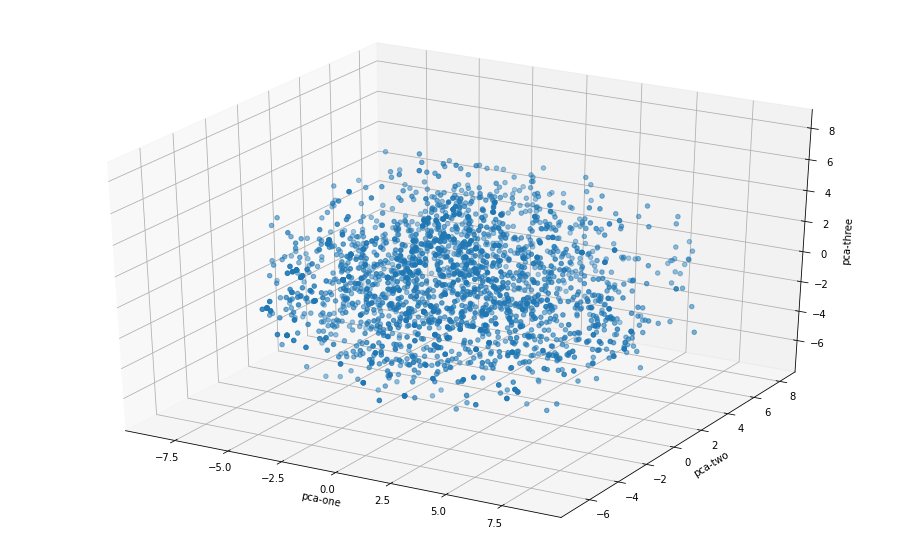

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[:,:]["pca-one"], 
    ys=df.loc[:,:]["pca-two"], 
    zs=df.loc[:,:]["pca-three"], 
    #c=df.loc[:,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

T-SNE on PCA

In [ ]:
pca = PCA(n_components=50)
pca_result_reduction = pca.fit_transform(saved_embeddings)

In [ ]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_reduction)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


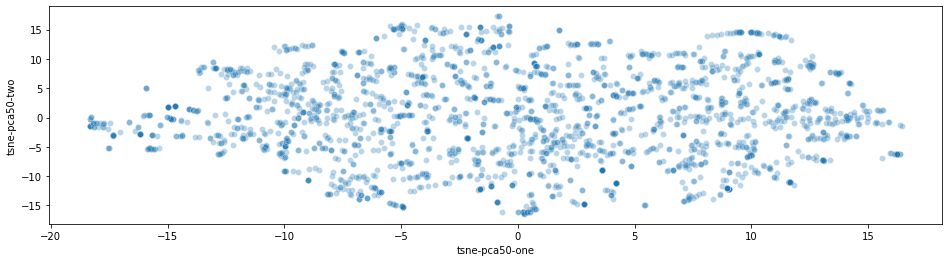

In [ ]:
df_subset = pd.DataFrame()
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
#ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
    #ax=ax3
)

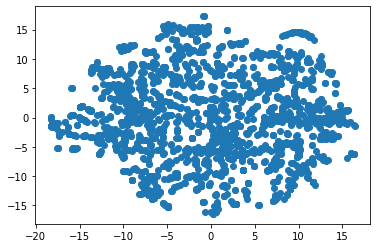

In [ ]:
plt.scatter(tsne_pca_results[:,0],tsne_pca_results[:,1])

In [ ]:
##3D
tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_reduction)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


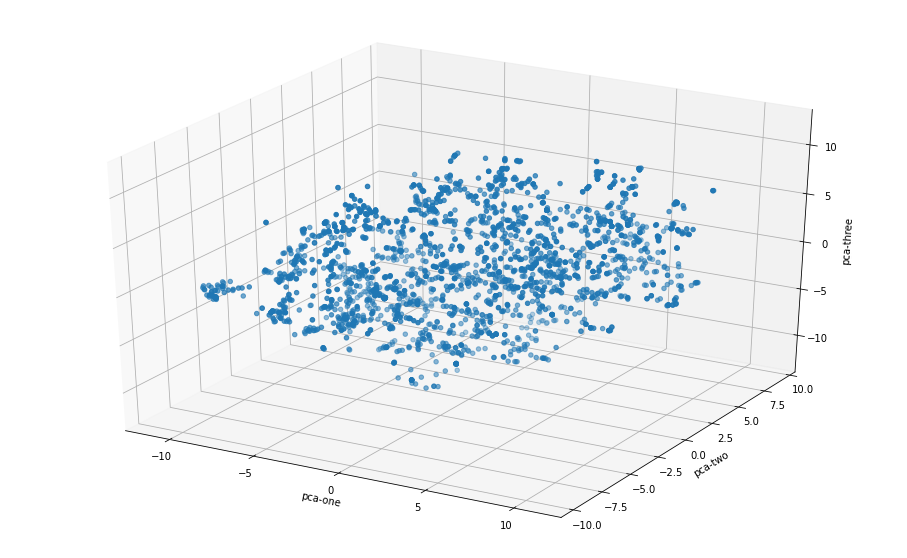

In [ ]:
df_subset = pd.DataFrame()
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
df_subset['tsne-pca50-three'] = tsne_pca_results[:,2]

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset.loc[:,:]['tsne-pca50-one'], 
    ys=df_subset.loc[:,:]['tsne-pca50-two'], 
    zs=df_subset.loc[:,:]['tsne-pca50-three'], 
    #c=df.loc[:,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()